<a href="https://colab.research.google.com/github/gptchat12370-ai/DLI/blob/main/4_evaluation_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# --- Commit 1: Loaded model and made predictions ---

# 1. Setup
import numpy as np
from tensorflow.keras.models import load_model

# Load model and test data
model = load_model("/content/data/phishing_model.h5")
X_test = np.load("/content/data/X_test.npy")
y_test = np.load("/content/data/y_test.npy")

# Predict
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print("Predictions generated. Sample:", y_pred[:10].flatten())

321/321 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step
Predictions generated. Sample: [0 0 0 0 1 1 0 1 1 0]


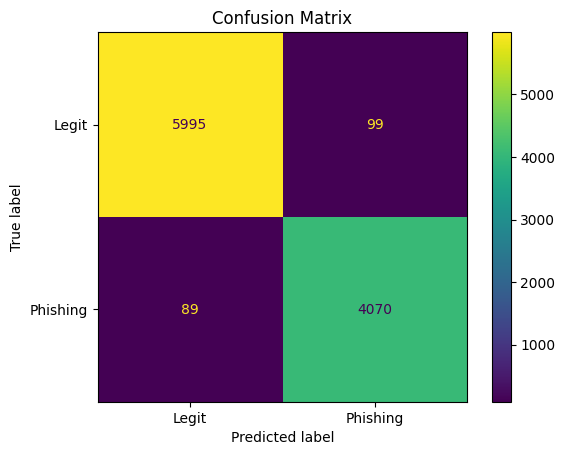

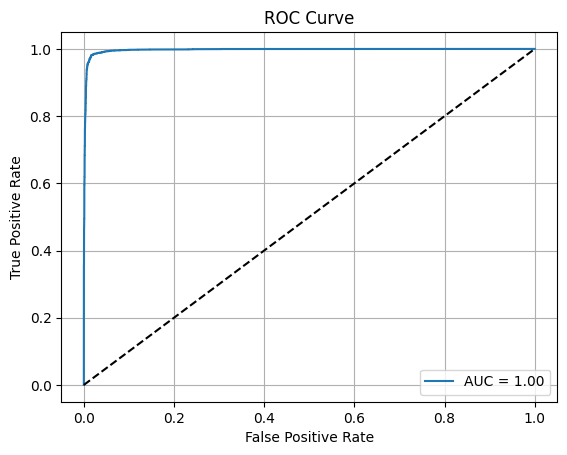

In [2]:
# --- Commit 2: Calculated and plotted confusion matrix + ROC curve ---

# 2. Metrics and Plots
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve
)
import matplotlib.pyplot as plt
import os

# Ensure results directory exists
os.makedirs("results", exist_ok=True)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Legit", "Phishing"])
disp.plot()
plt.title("Confusion Matrix")
plt.savefig("results/confusion_matrix.png")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.savefig("results/roc_curve.png")
plt.show()

In [3]:
# --- Commit 3: Printed and saved evaluation metrics ---

# 3. Evaluation Summary
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC Score: {auc:.4f}")

# Save to text file
with open("results/evaluation_report.txt", "w") as f:
    f.write(f"Accuracy: {accuracy:.4f}\n")
    f.write(f"Precision: {precision:.4f}\n")
    f.write(f"Recall: {recall:.4f}\n")
    f.write(f"F1 Score: {f1:.4f}\n")
    f.write(f"AUC: {auc:.4f}\n")

print("Evaluation metrics saved to results/evaluation_report.txt")

Accuracy: 0.9817
Precision: 0.9763
Recall: 0.9786
F1 Score: 0.9774
AUC Score: 0.9970
Evaluation metrics saved to results/evaluation_report.txt
